# **ERC**

In [2]:
from google.colab import files

print("Por favor, suba el archivo 'kidney_disease.csv' que descargó.")
uploaded = files.upload()

file_name = 'kidney_disease.csv'
if file_name in uploaded:
    print(f"\n¡Éxito! '{file_name}' subido correctamente.")
else:
    print(f"\nError: No se encontró '{file_name}'. Asegúrese de subir el archivo con ese nombre exacto.")

Por favor, suba el archivo 'kidney_disease.csv' que descargó.


Saving kidney_disease.csv to kidney_disease.csv

¡Éxito! 'kidney_disease.csv' subido correctamente.


In [7]:
import pandas as pd
import numpy as np

file_path = 'kidney_disease.csv'

print(f"Usando Pandas: {pd.__version__}")
print(f"Cargando datos desde: {file_path}")

try:
    df = pd.read_csv(
        file_path,
        na_values=['?', '\t?', ' '],  # Manejar '?', ' ?' y ' ' como nulos
        skipinitialspace=True
    )

    print(f"\n¡Éxito! Datos cargados.")
    print(f"Shape (forma) inicial: {df.shape}")

    print("\n--- Output de df.info() ---")
    df.info()

    print("\n--- Output de df.head() ---")
    print(df.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
    print("Asegúrese de que la Celda 1 se completó exitosamente.")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar los datos: {e}")

Usando Pandas: 2.2.2
Cargando datos desde: kidney_disease.csv

¡Éxito! Datos cargados.
Shape (forma) inicial: (400, 26)

--- Output de df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 n

# **Renombrando a español y asignar índice**

In [9]:
column_map = {
    'age': 'edad',
    'bp': 'presion_arterial',
    'sg': 'gravedad_especifica',
    'al': 'albumina',
    'su': 'azucar',
    'rbc': 'globulos_rojos',
    'pc': 'celulas_pus',
    'pcc': 'agrup_celulas_pus',
    'ba': 'bacterias',
    'bgr': 'glucosa_sanguinea',
    'bu': 'urea_sanguinea',
    'sc': 'creatinina_serica',
    'sod': 'sodio',
    'pot': 'potasio',
    'hemo': 'hemoglobina',
    'pcv': 'vol_celular_paq',
    'wc': 'recuento_glob_blancos',
    'rc': 'recuento_glob_rojos',
    'htn': 'hipertension',
    'dm': 'diabetes_mellitus',
    'cad': 'enf_art_coronaria',
    'appet': 'apetito',
    'pe': 'edema_pedal',
    'ane': 'anemia',
    'classification': 'clase'
}

try:
    df.rename(columns=column_map, inplace=True)
    print("¡Éxito! Columnas renombradas a español.")

    df.set_index('id', inplace=True)
    print("¡Éxito! Columna 'id' asignada como índice.")

    print("\n--- Nuevo df.info() ---")
    df.info()

    print("\n--- Nuevo df.head() ---")
    print(df.head())

except KeyError:
    print("Error: Falló el renombrado. Es posible que esta celda ya haya sido ejecutada.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

¡Éxito! Columnas renombradas a español.
¡Éxito! Columna 'id' asignada como índice.

--- Nuevo df.info() ---
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   391 non-null    float64
 1   presion_arterial       388 non-null    float64
 2   gravedad_especifica    353 non-null    float64
 3   albumina               354 non-null    float64
 4   azucar                 351 non-null    float64
 5   globulos_rojos         248 non-null    object 
 6   celulas_pus            335 non-null    object 
 7   agrup_celulas_pus      396 non-null    object 
 8   bacterias              396 non-null    object 
 9   glucosa_sanguinea      356 non-null    float64
 10  urea_sanguinea         381 non-null    float64
 11  creatinina_serica      383 non-null    float64
 12  sodio                  313 non-null    float64
 13  potasio

# **Limpieza Semántica (Traducción de Valores)**

In [10]:
print("Iniciando limpieza semántica (Fase F2)...")

try:
    df.rename(columns={'gravedad_especifica': 'densidad_urinaria'}, inplace=True)
    print("- Columna 'gravedad_especifica' renombrada a 'densidad_urinaria'.")

    map_presente = {'notpresent': 'no', 'present': 'si'}
    cols_presente = ['agrup_celulas_pus', 'bacterias']
    for col in cols_presente:
        df[col] = df[col].replace(map_presente)

    map_normal = {'abnormal': 'anormal', 'normal': 'normal'}
    cols_normal = ['globulos_rojos', 'celulas_pus']
    for col in cols_normal:
        df[col] = df[col].replace(map_normal)

    map_si_no = {'yes': 'si', 'no': 'no'}
    cols_si_no = ['hipertension', 'diabetes_mellitus', 'enf_art_coronaria',
                  'edema_pedal', 'anemia']
    for col in cols_si_no:
        df[col] = df[col].replace(map_si_no)

    map_apetito = {'good': 'bueno', 'poor': 'malo'}
    df['apetito'] = df['apetito'].replace(map_apetito)

    print("- Valores 'notpresent'/'present' cambiados a 'no'/'si'.")
    print("- Valores 'abnormal'/'normal' cambiados a 'anormal'/'normal'.")
    print("- Valores 'yes'/'no' cambiados a 'si'/'no'.")
    print("- Valores de 'apetito' cambiados a 'bueno'/'malo'.")
    print("\n--- df.head() (Post-Limpieza Semántica) ---")
    print(df.head())
    print("\n--- Valores únicos en columnas categóricas (Post-Limpieza) ---")
    cols_categoricas = ['globulos_rojos', 'celulas_pus', 'agrup_celulas_pus', 'bacterias',
                        'hipertension', 'diabetes_mellitus', 'enf_art_coronaria',
                        'apetito', 'edema_pedal', 'anemia']

    for col in cols_categoricas:
        print(f"Valores en '{col}': {df[col].unique()}")

except Exception as e:
    print(f"Ocurrió un error durante la limpieza semántica: {e}")

Iniciando limpieza semántica (Fase F2)...
- Columna 'gravedad_especifica' renombrada a 'densidad_urinaria'.
- Valores 'notpresent'/'present' cambiados a 'no'/'si'.
- Valores 'abnormal'/'normal' cambiados a 'anormal'/'normal'.
- Valores 'yes'/'no' cambiados a 'si'/'no'.
- Valores de 'apetito' cambiados a 'bueno'/'malo'.

--- df.head() (Post-Limpieza Semántica) ---
    edad  presion_arterial  densidad_urinaria  albumina  azucar  \
id                                                                
0   48.0              80.0              1.020       1.0     0.0   
1    7.0              50.0              1.020       4.0     0.0   
2   62.0              80.0              1.010       2.0     3.0   
3   48.0              70.0              1.005       4.0     0.0   
4   51.0              80.0              1.010       2.0     0.0   

   globulos_rojos celulas_pus agrup_celulas_pus bacterias  glucosa_sanguinea  \
id                                                                             
0   

# **Corregir Tipos de Datos**

In [11]:
print("Iniciando corrección de tipos de datos (Fase F2)...")
print("Columnas a convertir: 'vol_celular_paq', 'recuento_glob_blancos', 'recuento_glob_rojos'")
cols_a_convertir = ['vol_celular_paq', 'recuento_glob_blancos', 'recuento_glob_rojos']

try:
    tipos_antes = df[cols_a_convertir].dtypes

    for col in cols_a_convertir:

        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("\n¡Conversión completada!")
    print("\n--- Verificación de Dtypes (Antes) ---")
    print(tipos_antes)

    print("\n--- Verificación de Dtypes (Después) ---")
    print(df[cols_a_convertir].dtypes)

    print("\n--- Nuevo df.info() (Post-Conversión) ---")
    df.info()

except KeyError as e:
    print(f"Error: La columna {e} no fue encontrada. Asegúrese de haber ejecutado la Celda 3 (renombrado).")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Iniciando corrección de tipos de datos (Fase F2)...
Columnas a convertir: 'vol_celular_paq', 'recuento_glob_blancos', 'recuento_glob_rojos'

¡Conversión completada!

--- Verificación de Dtypes (Antes) ---
vol_celular_paq          float64
recuento_glob_blancos    float64
recuento_glob_rojos      float64
dtype: object

--- Verificación de Dtypes (Después) ---
vol_celular_paq          float64
recuento_glob_blancos    float64
recuento_glob_rojos      float64
dtype: object

--- Nuevo df.info() (Post-Conversión) ---
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   391 non-null    float64
 1   presion_arterial       388 non-null    float64
 2   densidad_urinaria      353 non-null    float64
 3   albumina               354 non-null    float64
 4   azucar                 351 non-null    float64
 5   globulos_rojos 

# **Instalación JIT y Visualización de Nulos**


--- Análisis de Nulos (NaN) ---
Porcentaje de datos nulos por columna (solo las que tienen nulos):
globulos_rojos           38.00
recuento_glob_rojos      32.75
recuento_glob_blancos    26.50
potasio                  22.00
sodio                    21.75
vol_celular_paq          17.75
celulas_pus              16.25
hemoglobina              13.00
azucar                   12.25
densidad_urinaria        11.75
albumina                 11.50
glucosa_sanguinea        11.00
urea_sanguinea            4.75
creatinina_serica         4.25
presion_arterial          3.00
edad                      2.25
agrup_celulas_pus         1.00
bacterias                 1.00
hipertension              0.50
diabetes_mellitus         0.50
enf_art_coronaria         0.50
apetito                   0.25
edema_pedal               0.25
anemia                    0.25
dtype: float64

Generando mapa de calor de nulos...


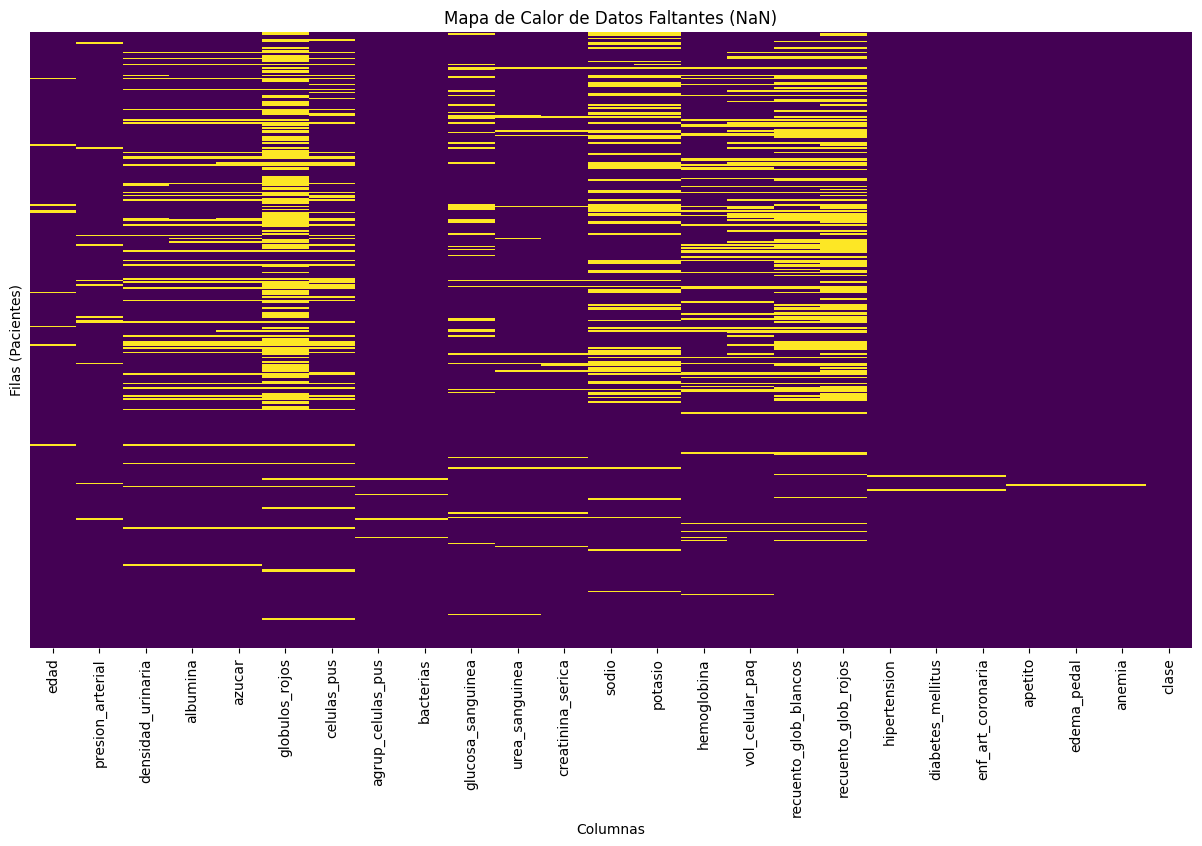

In [12]:
!pip install matplotlib
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Análisis de Nulos (NaN) ---")

porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False)

if porcentaje_nulos.empty:
    print("¡Increíble! No hay datos nulos.")
else:
    print("Porcentaje de datos nulos por columna (solo las que tienen nulos):")
    print(porcentaje_nulos)

    print("\nGenerando mapa de calor de nulos...")
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Mapa de Calor de Datos Faltantes (NaN)')
    plt.xlabel('Columnas')
    plt.ylabel('Filas (Pacientes)')
    plt.show()

# **Instalación JIT (F2/F3) e Imputación Simple**

In [13]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer
import numpy as np

print("\n--- F2: Imputación Simple (Paso 1: < 5%) ---")
print("Parámetros: Numéricos='mediana', Categóricos='moda'.")
cols_num_simples = ['edad', 'presion_arterial', 'urea_sanguinea', 'creatinina_serica']

cols_cat_simples = ['agrup_celulas_pus', 'bacterias', 'hipertension', 'diabetes_mellitus',
                    'enf_art_coronaria', 'apetito', 'edema_pedal', 'anemia']

try:

    imputer_num = SimpleImputer(strategy='median')

    imputer_cat = SimpleImputer(strategy='most_frequent')


    print(f"Aplicando 'mediana' a: {cols_num_simples}")
    df[cols_num_simples] = imputer_num.fit_transform(df[cols_num_simples])

    print(f"Aplicando 'moda' a: {cols_cat_simples}")
    df[cols_cat_simples] = imputer_cat.fit_transform(df[cols_cat_simples])

    print("\n¡Imputación Simple (Paso 1) completada!")
    print("\n--- Conteo de Nulos (Post-Paso 1) ---")

    nulos_restantes = df.isnull().sum()
    nulos_restantes = nulos_restantes[nulos_restantes > 0].sort_values(ascending=False)

    if nulos_restantes.empty:
        print("¡No quedan nulos!")
    else:
        print("Nulos restantes (solo las columnas 'difíciles' > 5%):")
        print(nulos_restantes)

except Exception as e:
    print(f"Ocurrió un error: {e}")


--- F2: Imputación Simple (Paso 1: < 5%) ---
Parámetros: Numéricos='mediana', Categóricos='moda'.
Aplicando 'mediana' a: ['edad', 'presion_arterial', 'urea_sanguinea', 'creatinina_serica']
Aplicando 'moda' a: ['agrup_celulas_pus', 'bacterias', 'hipertension', 'diabetes_mellitus', 'enf_art_coronaria', 'apetito', 'edema_pedal', 'anemia']

¡Imputación Simple (Paso 1) completada!

--- Conteo de Nulos (Post-Paso 1) ---
Nulos restantes (solo las columnas 'difíciles' > 5%):
globulos_rojos           152
recuento_glob_rojos      131
recuento_glob_blancos    106
potasio                   88
sodio                     87
vol_celular_paq           71
celulas_pus               65
hemoglobina               52
azucar                    49
densidad_urinaria         47
albumina                  46
glucosa_sanguinea         44
dtype: int64


# **Codificacion de Categóricas**

In [14]:
print("--- F2: Preparando Categóricas para Imputación Avanzada ---")

cols_para_codificar = ['globulos_rojos', 'celulas_pus']

map_normal_anormal = {'normal': 0, 'anormal': 1}

try:
    for col in cols_para_codificar:

        nulos_antes = df[col].isnull().sum()

        df[col] = df[col].map(map_normal_anormal)

        nulos_despues = df[col].isnull().sum()

        print(f"Columna '{col}' codificada: 'normal'->0, 'anormal'->1.")
        print(f"  Nulos en '{col}' (antes): {nulos_antes}")
        print(f"  Nulos en '{col}' (después): {nulos_despues}")

        if nulos_antes != nulos_despues:
            print(f"  ¡Alerta! El conteo de nulos cambió inesperadamente.")

    print("\n--- df.info() (Post-Codificación) ---")
    df.info()

except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F2: Preparando Categóricas para Imputación Avanzada ---
Columna 'globulos_rojos' codificada: 'normal'->0, 'anormal'->1.
  Nulos en 'globulos_rojos' (antes): 152
  Nulos en 'globulos_rojos' (después): 152
Columna 'celulas_pus' codificada: 'normal'->0, 'anormal'->1.
  Nulos en 'celulas_pus' (antes): 65
  Nulos en 'celulas_pus' (después): 65

--- df.info() (Post-Codificación) ---
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   400 non-null    float64
 1   presion_arterial       400 non-null    float64
 2   densidad_urinaria      353 non-null    float64
 3   albumina               354 non-null    float64
 4   azucar                 351 non-null    float64
 5   globulos_rojos         248 non-null    float64
 6   celulas_pus            335 non-null    float64
 7   agrup_celulas_pus      400 non-null    obje

# **Codificación Final**

In [15]:
print("--- F3: Codificación Final (Pre-Imputación) ---")
print("Convirtiendo todas las columnas 'object' a números...")

df_codificado = df.copy()
mapeos_realizados = {}

try:
    cols_object_restantes = df_codificado.select_dtypes(include=['object']).columns

    print(f"Columnas a codificar: {list(cols_object_restantes)}")

    map_si_no = {'no': 0, 'si': 1}
    cols_si_no = ['hipertension', 'diabetes_mellitus', 'enf_art_coronaria',
                  'edema_pedal', 'anemia', 'agrup_celulas_pus', 'bacterias']

    for col in cols_si_no:
        if col in df_codificado.columns:
            df_codificado[col] = df_codificado[col].map(map_si_no).astype(int)
            mapeos_realizados[col] = "0:no, 1:si"

    if 'apetito' in df_codificado.columns:
        df_codificado['apetito'] = df_codificado['apetito'].map({'malo': 0, 'bueno': 1}).astype(int)
        mapeos_realizados['apetito'] = "0:malo, 1:bueno"

    if 'clase' in df_codificado.columns:
        df_codificado['clase'] = df_codificado['clase'].str.strip()
        df_codificado['clase'] = df_codificado['clase'].map({'notckd': 0, 'ckd': 1}).astype(int)
        mapeos_realizados['clase'] = "0:notckd, 1:ckd"

    print("\n¡Codificación completada!")
    print("Mapeos aplicados:")
    for k, v in mapeos_realizados.items():
        print(f" - {k}: ({v})")

    print("\n--- df_codificado.info() (Post-Codificación Final) ---")
    df_codificado.info()

    print("\n--- df_codificado.head() ---")
    print(df_codificado.head())

except Exception as e:
    print(f"Ocurrió un error: {e}")
    df_codificado = df.copy()

--- F3: Codificación Final (Pre-Imputación) ---
Convirtiendo todas las columnas 'object' a números...
Columnas a codificar: ['agrup_celulas_pus', 'bacterias', 'hipertension', 'diabetes_mellitus', 'enf_art_coronaria', 'apetito', 'edema_pedal', 'anemia', 'clase']
Ocurrió un error: Cannot convert non-finite values (NA or inf) to integer


# **Análisis de los Outliers - Resumen Estadístico**

In [16]:
print("--- F2: Análisis de Outliers (Paso 1: .describe()) ---")

try:
    resumen_estadistico = df_codificado.describe().T

    print(resumen_estadistico[[ 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F2: Análisis de Outliers (Paso 1: .describe()) ---
                       count         mean          std       min      25%  \
edad                   400.0    51.562500    16.982996     2.000    42.00   
presion_arterial       400.0    76.575000    13.489785    50.000    70.00   
densidad_urinaria      353.0     1.017408     0.005717     1.005     1.01   
albumina               354.0     1.016949     1.352679     0.000     0.00   
azucar                 351.0     0.450142     1.099191     0.000     0.00   
globulos_rojos         248.0     0.189516     0.392711     0.000     0.00   
celulas_pus            335.0     0.226866     0.419431     0.000     0.00   
glucosa_sanguinea      356.0   148.036517    79.281714    22.000    99.00   
urea_sanguinea         400.0    56.693000    49.395258     1.500    27.00   
creatinina_serica      400.0     2.997125     5.628886     0.400     0.90   
sodio                  313.0   137.528754    10.408752     4.500   135.00   
potasio              

# **Corrección de los Outliers **

In [17]:
import numpy as np

print("--- F2: Corrigiendo outliers fisiológicamente imposibles ---")

df_corregido = df_codificado.copy()

try:
    conteo_outliers_pot = (df_corregido['potasio'] > 10.0).sum()
    if conteo_outliers_pot > 0:
        df_corregido['potasio'] = np.where(df_corregido['potasio'] > 10.0,
                                           np.nan,
                                           df_corregido['potasio'])
        print(f" - Corregidos {conteo_outliers_pot} outliers en 'potasio' (convertidos a NaN).")
    else:
        print(" - No se encontraron outliers (>10.0) en 'potasio'.")

    conteo_outliers_sod = (df_corregido['sodio'] < 100.0).sum()
    if conteo_outliers_sod > 0:
        df_corregido['sodio'] = np.where(df_corregido['sodio'] < 100.0,
                                         np.nan,
                                         df_corregido['sodio'])
        print(f" - Corregidos {conteo_outliers_sod} outliers en 'sodio' (convertidos a NaN).")
    else:
        print(" - No se encontraron outliers (<100.0) en 'sodio'.")

    print("\n¡Corrección de outliers completada!")

    print("\n--- Nuevo conteo de Nulos (Post-Corrección de Outliers) ---")
    nulos_actuales = df_corregido.isnull().sum()
    nulos_actuales = nulos_actuales[nulos_actuales > 0].sort_values(ascending=False)
    print(nulos_actuales)

except KeyError as e:
    print(f"Error: No se encontró la columna {e}.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F2: Corrigiendo outliers fisiológicamente imposibles ---
 - Corregidos 2 outliers en 'potasio' (convertidos a NaN).
 - Corregidos 1 outliers en 'sodio' (convertidos a NaN).

¡Corrección de outliers completada!

--- Nuevo conteo de Nulos (Post-Corrección de Outliers) ---
globulos_rojos           152
recuento_glob_rojos      131
recuento_glob_blancos    106
potasio                   90
sodio                     88
vol_celular_paq           71
celulas_pus               65
hemoglobina               52
azucar                    49
densidad_urinaria         47
albumina                  46
glucosa_sanguinea         44
dtype: int64


# **Imputación Avanzada (MICE) y Limpieza Final**

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

print("--- F2: Iniciando Imputación Avanzada (MICE) ---")
print("Usando el 'df_corregido' de la Celda 11.")
print("Esto puede tardar unos segundos...")

try:
    columnas = df_corregido.columns
    indice = df_corregido.index
    mice_imputer = IterativeImputer(random_state=42, max_iter=10)

    df_imputado_array = mice_imputer.fit_transform(df_corregido)

    print("¡Imputación completada!")

    df_imputado = pd.DataFrame(df_imputado_array, columns=columnas, index=indice)
    cols_enteras = [
        'edad', 'globulos_rojos', 'celulas_pus', 'agrup_celulas_pus', 'bacterias',
        'hipertension', 'diabetes_mellitus', 'enf_art_coronaria', 'apetito',
        'edema_pedal', 'anemia', 'clase'
    ]
    for col in cols_enteras:
        if col in df_imputado.columns:
            df_imputado[col] = np.round(df_imputado[col]).astype(int)

    print("Tipos de datos 'int' restaurados.")

    print("\n--- df_imputado.info() (Post-MICE) ---")
    df_imputado.info()

    print("\nVerificación final de nulos:")
    print(f"¿Queda algún nulo en el dataset?: {df_imputado.isnull().sum().any()}")

except Exception as e:
    print(f"Ocurrió un error durante la imputación MICE: {e}")

--- F2: Iniciando Imputación Avanzada (MICE) ---
Usando el 'df_corregido' de la Celda 11.
Esto puede tardar unos segundos...
Ocurrió un error durante la imputación MICE: could not convert string to float: 'no'


Codificación Final de TODAS las categóricas

In [19]:
print("--- F3: Codificación Final (Paso Obligatorio) ---")
print("Convirtiendo todas las columnas 'object' a números...")
df_codificado = df.copy()
mapeos_realizados = {}

try:
    cols_object_restantes = df_codificado.select_dtypes(include=['object']).columns

    print(f"Columnas 'object' encontradas: {list(cols_object_restantes)}")
    map_si_no = {'no': 0, 'si': 1}
    cols_si_no = ['hipertension', 'diabetes_mellitus', 'enf_art_coronaria',
                  'edema_pedal', 'anemia', 'agrup_celulas_pus', 'bacterias']

    for col in cols_si_no:
        if col in df_codificado.columns and df_codificado[col].dtype == 'object':
            df_codificado[col] = df_codificado[col].map(map_si_no)
            mapeos_realizados[col] = "0:no, 1:si"

    if 'apetito' in df_codificado.columns and df_codificado['apetito'].dtype == 'object':
        df_codificado['apetito'] = df_codificado['apetito'].map({'malo': 0, 'bueno': 1})
        mapeos_realizados['apetito'] = "0:malo, 1:bueno"

    if 'clase' in df_codificado.columns and df_codificado['clase'].dtype == 'object':
        df_codificado['clase'] = df_codificado['clase'].str.strip()
        df_codificado['clase'] = df_codificado['clase'].map({'notckd': 0, 'ckd': 1})
        mapeos_realizados['clase'] = "0:notckd, 1:ckd"

    print("\n¡Codificación completada!")
    print("Mapeos aplicados:")
    for k, v in mapeos_realizados.items():
        print(f" - {k}: ({v})")

    print("\n--- df_codificado.info() (Post-Codificación Final) ---")
    df_codificado.info()

except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F3: Codificación Final (Paso Obligatorio) ---
Convirtiendo todas las columnas 'object' a números...
Columnas 'object' encontradas: ['agrup_celulas_pus', 'bacterias', 'hipertension', 'diabetes_mellitus', 'enf_art_coronaria', 'apetito', 'edema_pedal', 'anemia', 'clase']

¡Codificación completada!
Mapeos aplicados:
 - hipertension: (0:no, 1:si)
 - diabetes_mellitus: (0:no, 1:si)
 - enf_art_coronaria: (0:no, 1:si)
 - edema_pedal: (0:no, 1:si)
 - anemia: (0:no, 1:si)
 - agrup_celulas_pus: (0:no, 1:si)
 - bacterias: (0:no, 1:si)
 - apetito: (0:malo, 1:bueno)
 - clase: (0:notckd, 1:ckd)

--- df_codificado.info() (Post-Codificación Final) ---
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   400 non-null    float64
 1   presion_arterial       400 non-null    float64
 2   densidad_urinaria      353 non-null    f

# **Corrección de Outliers Fisiológicamente Imposibles**

In [20]:
import numpy as np

print("--- F2: Corrigiendo outliers fisiológicamente imposibles ---")
df_corregido = df_codificado.copy()

try:
    conteo_outliers_pot = (df_corregido['potasio'] > 10.0).sum()
    if conteo_outliers_pot > 0:
        df_corregido['potasio'] = np.where(df_corregido['potasio'] > 10.0,
                                           np.nan,
                                           df_corregido['potasio'])
        print(f" - Corregidos {conteo_outliers_pot} outliers en 'potasio' (convertidos a NaN).")
    else:
        print(" - No se encontraron outliers (>10.0) en 'potasio'.")

    conteo_outliers_sod = (df_corregido['sodio'] < 100.0).sum()
    if conteo_outliers_sod > 0:
        df_corregido['sodio'] = np.where(df_corregido['sodio'] < 100.0,
                                         np.nan,
                                         df_corregido['sodio'])
        print(f" - Corregidos {conteo_outliers_sod} outliers en 'sodio' (convertidos a NaN).")
    else:
        print(" - No se encontraron outliers (<100.0) en 'sodio'.")

    print("\n¡Corrección de outliers completada!")

    print("\n--- Nuevo conteo de Nulos (Post-Corrección de Outliers) ---")
    nulos_actuales = df_corregido.isnull().sum()
    nulos_actuales = nulos_actuales[nulos_actuales > 0].sort_values(ascending=False)
    print(nulos_actuales)

except KeyError as e:
    print(f"Error: No se encontró la columna {e}.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F2: Corrigiendo outliers fisiológicamente imposibles ---
 - Corregidos 2 outliers en 'potasio' (convertidos a NaN).
 - Corregidos 1 outliers en 'sodio' (convertidos a NaN).

¡Corrección de outliers completada!

--- Nuevo conteo de Nulos (Post-Corrección de Outliers) ---
globulos_rojos           152
recuento_glob_rojos      131
recuento_glob_blancos    106
potasio                   90
sodio                     88
vol_celular_paq           71
celulas_pus               65
hemoglobina               52
azucar                    49
densidad_urinaria         47
albumina                  46
glucosa_sanguinea         44
diabetes_mellitus          5
enf_art_coronaria          2
dtype: int64


# **Imputación Avanzada (MICE) y Limpieza Final**

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

print("--- F2: Iniciando Imputación Avanzada (MICE) ---")
print("Usando el 'df_corregido' (100% numérico) de la Celda 11-Bis.")
print("Esto puede tardar unos segundos...")
df_a_imputar = df_corregido.copy()

try:

    columnas = df_a_imputar.columns
    indice = df_a_imputar.index

    mice_imputer = IterativeImputer(random_state=42, max_iter=10)

    df_imputado_array = mice_imputer.fit_transform(df_a_imputar)

    print("¡Imputación completada!")

    df_imputado = pd.DataFrame(df_imputado_array, columns=columnas, index=indice)

    cols_enteras = [
        'edad', 'globulos_rojos', 'celulas_pus', 'agrup_celulas_pus', 'bacterias',
        'hipertension', 'diabetes_mellitus', 'enf_art_coronaria', 'apetito',
        'edema_pedal', 'anemia', 'clase'
    ]

    for col in cols_enteras:
        if col in df_imputado.columns:

            df_imputado[col] = np.round(df_imputado[col]).astype(int)

    print("Tipos de datos 'int' restaurados.")

    print("\n--- df_imputado.info() (Post-MICE) ---")

    df_imputado.info()

    print("\nVerificación final de nulos:")
    print(f"¿Queda algún nulo en el dataset?: {df_imputado.isnull().sum().any()}")

except Exception as e:
    print(f"Ocurrió un error durante la imputación MICE: {e}")

--- F2: Iniciando Imputación Avanzada (MICE) ---
Usando el 'df_corregido' (100% numérico) de la Celda 11-Bis.
Esto puede tardar unos segundos...
¡Imputación completada!
Tipos de datos 'int' restaurados.

--- df_imputado.info() (Post-MICE) ---
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   400 non-null    int64  
 1   presion_arterial       400 non-null    float64
 2   densidad_urinaria      400 non-null    float64
 3   albumina               400 non-null    float64
 4   azucar                 400 non-null    float64
 5   globulos_rojos         400 non-null    int64  
 6   celulas_pus            400 non-null    int64  
 7   agrup_celulas_pus      400 non-null    int64  
 8   bacterias              400 non-null    int64  
 9   glucosa_sanguinea      400 non-null    float64
 10  urea_sanguinea         400 n

# **Separar Features (X) y Target (y)**

In [22]:
print("--- F3: Separando Features (X) y Target (y) ---")

try:

    y = df_imputado['clase']
    X = df_imputado.drop('clase', axis=1)

    print("¡Separación completada!")

    print("\n--- 'y' (Target) ---")
    print(f"Shape de y: {y.shape}")
    print("Conteo de clases (0=notckd, 1=ckd):")
    print(y.value_counts())

    print("\n--- 'X' (Features) ---")
    print(f"Shape de X: {X.shape}")
    print(X.head())

except KeyError:
    print("Error: No se encontró la columna 'clase' en df_imputado.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


--- F3: Separando Features (X) y Target (y) ---
¡Separación completada!

--- 'y' (Target) ---
Shape de y: (400,)
Conteo de clases (0=notckd, 1=ckd):
clase
1    250
0    150
Name: count, dtype: int64

--- 'X' (Features) ---
Shape de X: (400, 24)
    edad  presion_arterial  densidad_urinaria  albumina  azucar  \
id                                                                
0     48              80.0              1.020       1.0     0.0   
1      7              50.0              1.020       4.0     0.0   
2     62              80.0              1.010       2.0     3.0   
3     48              70.0              1.005       4.0     0.0   
4     51              80.0              1.010       2.0     0.0   

    globulos_rojos  celulas_pus  agrup_celulas_pus  bacterias  \
id                                                              
0                0            0                  0          0   
1                0            0                  0          0   
2                0       

# **Análisis de Correlación**

--- F2/F3: Análisis de Correlación (Multicolinealidad) ---


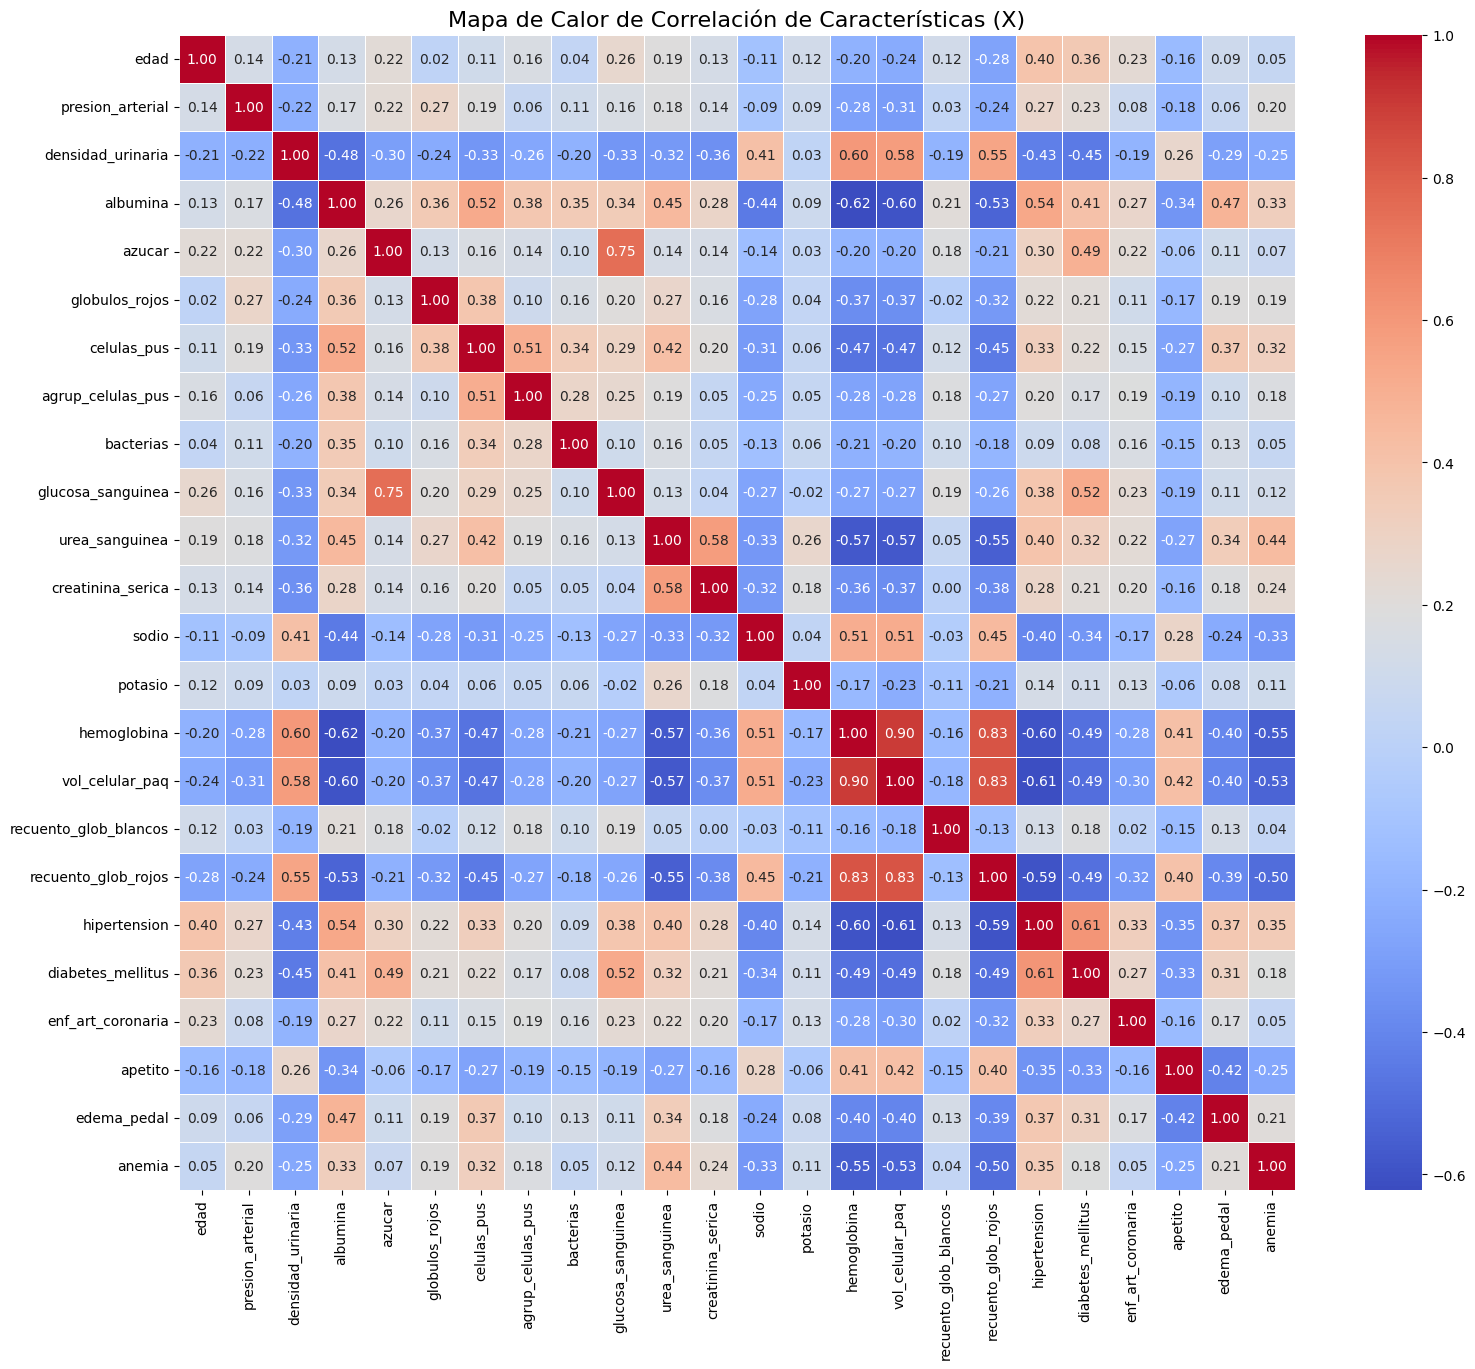

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- F2/F3: Análisis de Correlación (Multicolinealidad) ---")

try:
    corr_matrix = X.corr()

    plt.figure(figsize=(18, 15))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5
    )
    plt.title('Mapa de Calor de Correlación de Características (X)', fontsize=16)
    plt.show()

except NameError:
    print("Error: Asegúrese de que 'X' fue creado en la Celda 13.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

# **Eliminar Multicolinealidad y Analizar Sesgo**

--- F3: Ingeniería de Características ---
¡Éxito! Columna 'vol_celular_paq' eliminada.
Nuevo Shape de X_preparado: (400, 23)

Generando histogramas para las 23 características restantes...


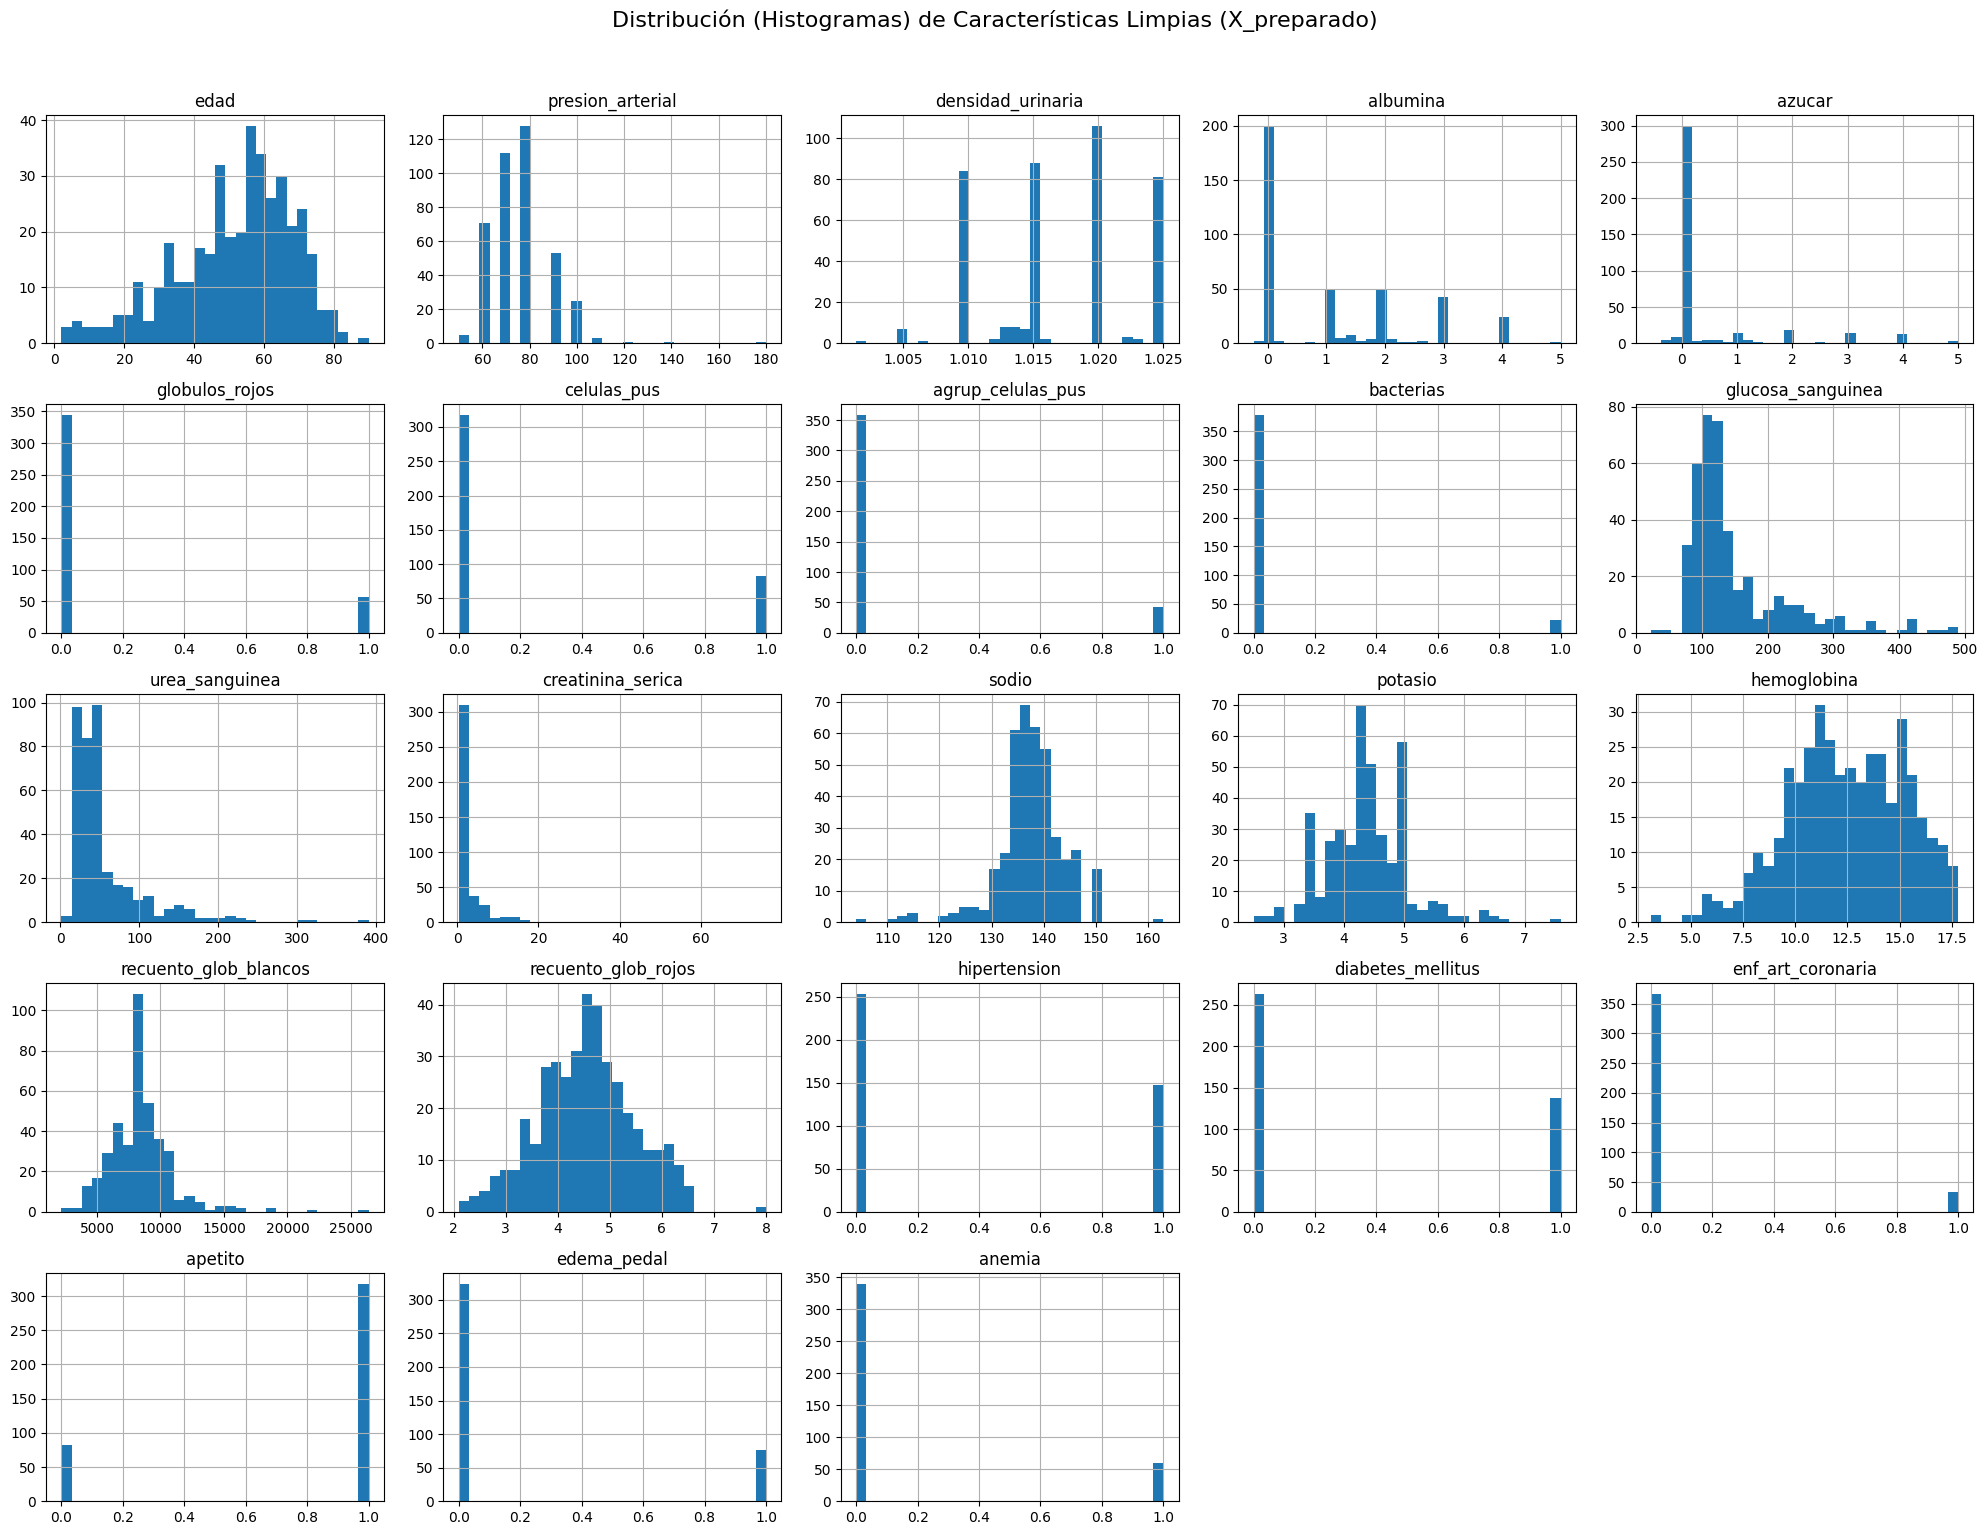

In [24]:
import matplotlib.pyplot as plt

print("--- F3: Ingeniería de Características ---")

try:
    col_a_eliminar = 'vol_celular_paq'

    if col_a_eliminar in X.columns:
        X_preparado = X.drop(col_a_eliminar, axis=1)
        print(f"¡Éxito! Columna '{col_a_eliminar}' eliminada.")
        print(f"Nuevo Shape de X_preparado: {X_preparado.shape}")
    else:
        print(f"Advertencia: La columna '{col_a_eliminar}' ya fue eliminada o no existe.")
        X_preparado = X.copy()
    print("\nGenerando histogramas para las 23 características restantes...")

    X_preparado.hist(bins=30, figsize=(20, 15), layout=(5, 5))
    plt.suptitle("Distribución (Histogramas) de Características Limpias (X_preparado)", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: Asegúrese de que 'X' fue creado en la Celda 13.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


# **Transformación Logarítmica (Manejo de Sesgo)**

--- F3: Aplicando Transformación Logarítmica (log1p) ---
 - Transformación logarítmica aplicada a 'creatinina_serica'.
 - Transformación logarítmica aplicada a 'urea_sanguinea'.
 - Transformación logarítmica aplicada a 'glucosa_sanguinea'.
 - Transformación logarítmica aplicada a 'recuento_glob_blancos'.

¡Transformación completada!

--- Verificando distribuciones (Post-Log) ---


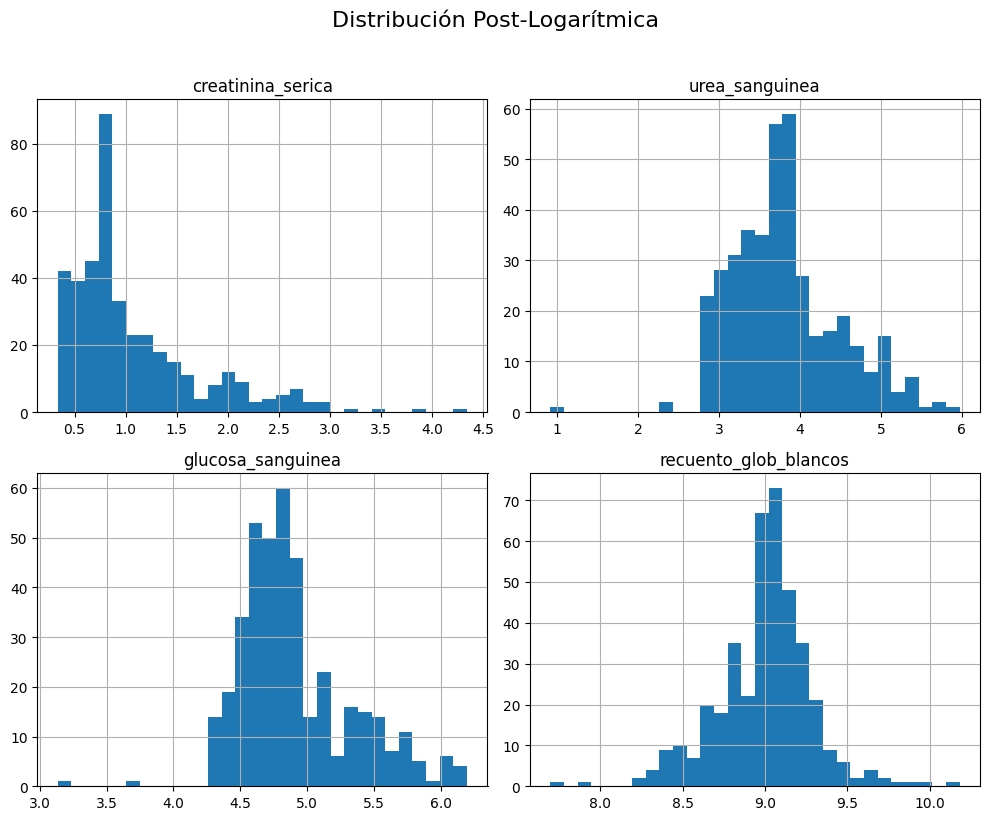

In [25]:
import numpy as np

print("--- F3: Aplicando Transformación Logarítmica (log1p) ---")

cols_con_sesgo = ['creatinina_serica', 'urea_sanguinea',
                  'glucosa_sanguinea', 'recuento_glob_blancos']

X_log = X_preparado.copy()

try:
    for col in cols_con_sesgo:
        if col in X_log.columns:
            X_log[col] = np.log1p(X_log[col])
            print(f" - Transformación logarítmica aplicada a '{col}'.")

    print("\n¡Transformación completada!")

    print("\n--- Verificando distribuciones (Post-Log) ---")
    X_log[cols_con_sesgo].hist(bins=30, figsize=(10, 8), layout=(2, 2))
    plt.suptitle("Distribución Post-Logarítmica", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

except NameError:
    print("Error: Asegúrese de que 'X_preparado' fue creado en la Celda 15.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

# **División de Datos (Train-Test Split)**

In [26]:
from sklearn.model_selection import train_test_split

print("--- F4: Dividiendo datos en Entrenamiento y Prueba ---")
print("Usando: 'X_log' (features) e 'y' (target)")

try:

    X_train, X_test, y_train, y_test = train_test_split(
        X_log,
        y,
        test_size=0.20,
        random_state=42,
        stratify=y
    )

    print("¡División completada!")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape X_test:  {X_test.shape}")

    print("\n--- Verificación de Estratificación (Train) ---")
    print(y_train.value_counts(normalize=True))

    print("\n--- Verificación de Estratificación (Test) ---")
    print(y_test.value_counts(normalize=True))

except NameError:
    print("Error: Asegúrese de que 'X_log' e 'y' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F4: Dividiendo datos en Entrenamiento y Prueba ---
Usando: 'X_log' (features) e 'y' (target)
¡División completada!
Shape X_train: (320, 23)
Shape X_test:  (80, 23)

--- Verificación de Estratificación (Train) ---
clase
1    0.625
0    0.375
Name: proportion, dtype: float64

--- Verificación de Estratificación (Test) ---
clase
1    0.625
0    0.375
Name: proportion, dtype: float64


# **Escalado de Características**

In [27]:
from sklearn.preprocessing import StandardScaler

print("--- F4: Escalando características (StandardScaler) ---")

try:
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    print("¡Escalado completado!")
    print(f"Shape X_train_scaled: {X_train_scaled.shape}")
    print(f"Shape X_test_scaled:  {X_test_scaled.shape}")
    print("\n--- Verificación de Escalado (Media de X_train_scaled) ---")
    print(f"Media (columnas): {np.mean(X_train_scaled, axis=0).round(5)}")
    print("\n--- Verificación de Escalado (Std de X_train_scaled) ---")
    print(f"Std Dev (columnas): {np.std(X_train_scaled, axis=0).round(5)}")

except NameError:
    print("Error: Asegúrese de que 'X_train' y 'X_test' fueron creados en la Celda 17.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F4: Escalando características (StandardScaler) ---
¡Escalado completado!
Shape X_train_scaled: (320, 23)
Shape X_test_scaled:  (80, 23)

--- Verificación de Escalado (Media de X_train_scaled) ---
Media (columnas): [-0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.
  0.  0. -0. -0.  0.]

--- Verificación de Escalado (Std de X_train_scaled) ---
Std Dev (columnas): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **Selección de Características (Test Univariado)**

In [28]:
from sklearn.feature_selection import f_classif
import pandas as pd

print("--- F3: Análisis de Significancia de Características (ANOVA F-test) ---")
print("Midiendo la relación entre cada feature (X_train_scaled) y el target (y_train)")

try:
    f_scores, p_values = f_classif(X_train_scaled, y_train)
    df_features = pd.DataFrame({
        'Feature': X_log.columns,
        'F-Score': f_scores,
        'p-value': p_values
    })

    df_features = df_features.sort_values(by='F-Score', ascending=False)
    print("¡Análisis completado! Características ordenadas por importancia:")

    print(df_features.to_string())
    significativas = (df_features['p-value'] < 0.05).sum()
    print(f"\nResumen:")
    print(f"Total de características: {len(df_features)}")
    print(f"Características estadísticamente significativas (p < 0.05): {significativas}")

except NameError:
    print("Error: Asegúrese de que 'X_train_scaled', 'y_train' y 'X_log' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F3: Análisis de Significancia de Características (ANOVA F-test) ---
Midiendo la relación entre cada feature (X_train_scaled) y el target (y_train)
¡Análisis completado! Características ordenadas por importancia:
                  Feature     F-Score       p-value
14            hemoglobina  469.867379  1.292934e-64
2       densidad_urinaria  372.969516  1.567029e-55
16    recuento_glob_rojos  326.765023  9.721547e-51
3                albumina  218.331475  5.618346e-38
17           hipertension  168.099398  3.758873e-31
11      creatinina_serica  132.942748  6.209170e-26
18      diabetes_mellitus  124.117347  1.473220e-24
12                  sodio  101.783091  6.009856e-21
6             celulas_pus   64.211538  2.142193e-14
10         urea_sanguinea   62.588330  4.258102e-14
9       glucosa_sanguinea   60.628237  9.802789e-14
20                apetito   53.576087  2.048933e-12
21            edema_pedal   48.707746  1.735057e-11
22                 anemia   38.697020  1.557661e-09
4   

## Creación de Datasets Finales

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

print("--- F3/F4: Preparación Final (excluyendo 'potasio') ---")

try:
    X_final_features = X_log.drop('potasio', axis=1)

    final_22_features = X_final_features.columns
    print(f"¡Característica 'potasio' (ruido) eliminada!")
    print(f"Shape de X_final_features: {X_final_features.shape}")

    X_train, X_test, y_train, y_test = train_test_split(
        X_final_features, y,
        test_size=0.20,
        random_state=42,
        stratify=y
    )
    print("\nDivisión (Train/Test) completada.")

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    print("\n¡Escalado (Scaler) completado!")
    print(f"Shape X_train_scaled (final): {X_train_scaled.shape}")
    print(f"Shape X_test_scaled (final):  {X_test_scaled.shape}")

    print("\nVerificación de Escalado (Media y Std):")
    print(f"Media (columnas): {np.mean(X_train_scaled, axis=0).round(5)}")
    print(f"Std Dev (columnas): {np.std(X_train_scaled, axis=0).round(5)}")

except NameError:
    print("Error: Asegúrese de que 'X_log' e 'y' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F3/F4: Preparación Final (excluyendo 'potasio') ---
¡Característica 'potasio' (ruido) eliminada!
Shape de X_final_features: (400, 22)

División (Train/Test) completada.

¡Escalado (Scaler) completado!
Shape X_train_scaled (final): (320, 22)
Shape X_test_scaled (final):  (80, 22)

Verificación de Escalado (Media y Std):
Media (columnas): [-0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0. -0. -0.  0.]
Std Dev (columnas): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Modelo Baseline (Regresión Logística)

--- F4: Entrenando Modelo Baseline (Regresión Logística) ---
Usando las 22 características optimizadas (X_train_scaled)

¡Modelo Baseline entrenado!

--- Evaluación en DATOS DE PRUEBA (Test) ---

1. Reporte de Clasificación (Completo):
              precision    recall  f1-score   support

  0 (notckd)       0.97      1.00      0.98        30
     1 (ckd)       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


2. Matriz de Confusión:


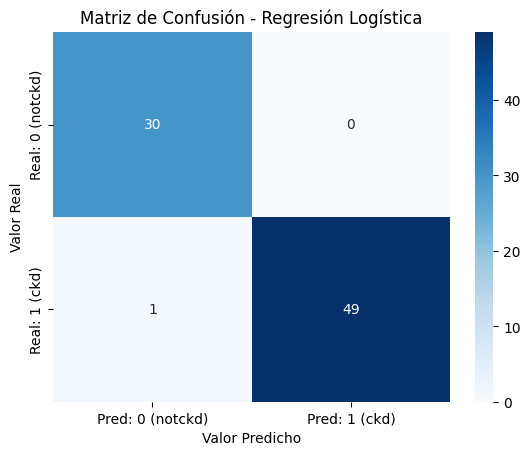


3. AUC-ROC Score (Área bajo la curva):
AUC: 1.0000


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
print("--- F4: Entrenando Modelo Baseline (Regresión Logística) ---")
print("Usando las 22 características optimizadas (X_train_scaled)")
try:
    # 1. Crear el Modelo
    modelo_log = LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )

    modelo_log.fit(X_train_scaled, y_train)

    print("\n¡Modelo Baseline entrenado!")

    print("\n--- Evaluación en DATOS DE PRUEBA (Test) ---")

    y_pred_log = modelo_log.predict(X_test_scaled)

    print("\n1. Reporte de Clasificación (Completo):")

    print(classification_report(y_test, y_pred_log, target_names=['0 (notckd)', '1 (ckd)']))

    print("\n2. Matriz de Confusión:")

    cm_log = confusion_matrix(y_test, y_pred_log)

    sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: 0 (notckd)', 'Pred: 1 (ckd)'],
                yticklabels=['Real: 0 (notckd)', 'Real: 1 (ckd)'])
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.title('Matriz de Confusión - Regresión Logística')
    plt.show()

    print("\n3. AUC-ROC Score (Área bajo la curva):")
    auc_log = roc_auc_score(y_test, modelo_log.predict_proba(X_test_scaled)[:, 1])
    print(f"AUC: {auc_log:.4f}")

except NameError:
    print("Error: Asegúrese de que 'X_train_scaled' e 'y_train' existen (de Celda 17-Bis).")
except Exception as e:
    print(f"Ocurrió un error: {e}")

# **Interpretabilidad del Modelo Baseline**

--- F4: Interpretabilidad (Importancia de Características) ---
Características ordenadas por importancia (coeficiente absoluto):
           Caracteristica  Coeficiente
13            hemoglobina    -1.927043
2       densidad_urinaria    -1.882644
15    recuento_glob_rojos    -1.246596
3                albumina     1.004210
11      creatinina_serica     0.998861
17      diabetes_mellitus     0.967089
19                apetito    -0.824982
16           hipertension     0.733688
9       glucosa_sanguinea     0.630916
1        presion_arterial     0.581757
5          globulos_rojos     0.512181
4                  azucar     0.473891
6             celulas_pus     0.332178
12                  sodio    -0.321874
20            edema_pedal     0.294394
0                    edad    -0.266980
14  recuento_glob_blancos     0.214140
10         urea_sanguinea    -0.108963
7       agrup_celulas_pus     0.076279
21                 anemia     0.075629
8               bacterias     0.033791
18      enf_a

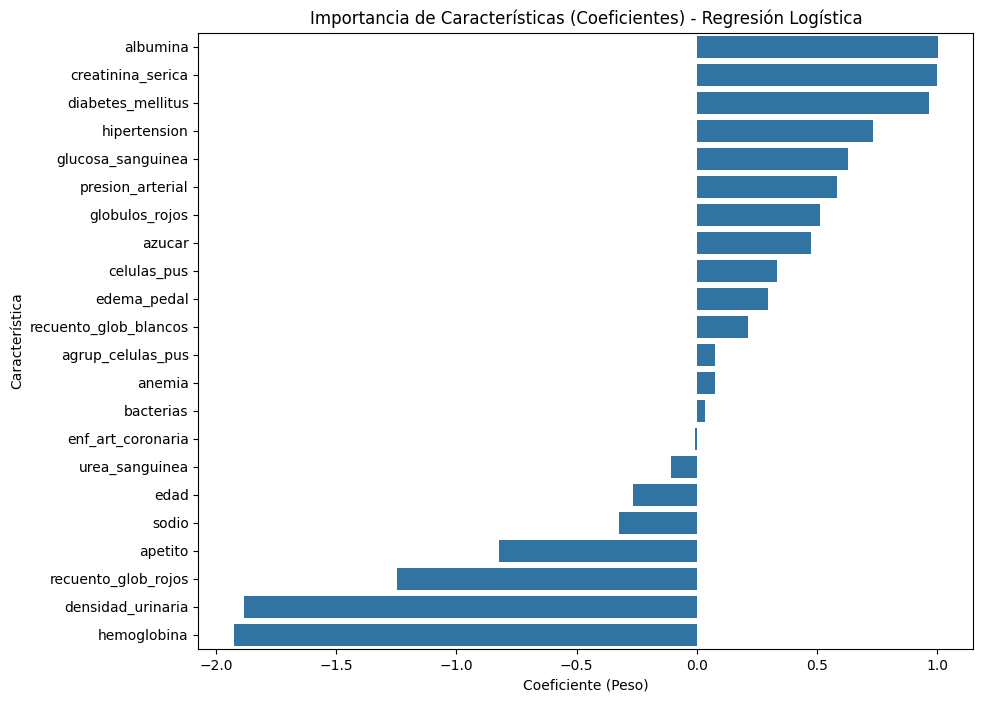

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

print("--- F4: Interpretabilidad (Importancia de Características) ---")

try:

    feature_names = final_22_features

    coefficients = modelo_log.coef_[0]

    df_coef = pd.DataFrame({
        'Caracteristica': feature_names,
        'Coeficiente': coefficients
    })

    df_coef['Importancia (Abs)'] = np.abs(df_coef['Coeficiente'])
    df_coef = df_coef.sort_values(by='Importancia (Abs)', ascending=False)

    print("Características ordenadas por importancia (coeficiente absoluto):")
    print(df_coef[['Caracteristica', 'Coeficiente']].to_string())

    plt.figure(figsize=(10, 8))
    sns.barplot(
        x='Coeficiente',
        y='Caracteristica',
        data=df_coef.sort_values(by='Coeficiente', ascending=False)
    )
    plt.title('Importancia de Características (Coeficientes) - Regresión Logística')
    plt.xlabel('Coeficiente (Peso)')
    plt.ylabel('Característica')
    plt.show()

except NameError:
    print("Error: Asegúrese de que 'modelo_log' y 'final_22_features' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

# **Modelo Avanzado (Random Forest)**

--- F4: Entrenando Modelo Avanzado (Random Forest) ---
Usando las 22 características optimizadas (X_train_scaled)

¡Modelo Avanzado entrenado!

--- Evaluación en DATOS DE PRUEBA (Test) ---

1. Reporte de Clasificación (Completo):
              precision    recall  f1-score   support

  0 (notckd)       0.97      1.00      0.98        30
     1 (ckd)       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


2. Matriz de Confusión:


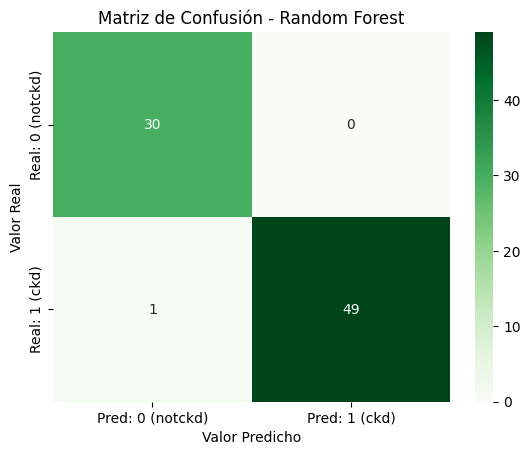


3. AUC-ROC Score (Área bajo la curva):
AUC: 1.0000


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- F4: Entrenando Modelo Avanzado (Random Forest) ---")
print("Usando las 22 características optimizadas (X_train_scaled)")

try:

    modelo_rf = RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    )

    modelo_rf.fit(X_train_scaled, y_train)

    print("\n¡Modelo Avanzado entrenado!")

    print("\n--- Evaluación en DATOS DE PRUEBA (Test) ---")

    y_pred_rf = modelo_rf.predict(X_test_scaled)

    print("\n1. Reporte de Clasificación (Completo):")
    print(classification_report(y_test, y_pred_rf, target_names=['0 (notckd)', '1 (ckd)']))

    print("\n2. Matriz de Confusión:")
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Pred: 0 (notckd)', 'Pred: 1 (ckd)'],
                yticklabels=['Real: 0 (notckd)', 'Real: 1 (ckd)'])
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.title('Matriz de Confusión - Random Forest')
    plt.show()

    print("\n3. AUC-ROC Score (Área bajo la curva):")
    auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
    print(f"AUC: {auc_rf:.4f}")

except NameError:
    print("Error: Asegúrese de que 'X_train_scaled' e 'y_train' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

In [34]:
import joblib

print("--- F5: Síntesis y Entrega ---")
print("Guardando el modelo 'baseline' (Regresión Logística) y el 'scaler'.")

try:
    joblib.dump(modelo_log, 'modelo_erc_logistico.joblib')
    print(" - ¡Éxito! Modelo guardado como 'modelo_erc_logistico.joblib'")

    joblib.dump(scaler, 'scaler_erc.joblib')
    print(" - ¡Éxito! Scaler guardado como 'scaler_erc.joblib'")
    joblib.dump(final_22_features, 'lista_22_features.joblib')
    print(" - ¡Éxito! Lista de 22 features guardada como 'lista_22_features.joblib'")

    print("\n¡Proyecto completado y artefactos guardados!")
    print("Podemos descargar estos 3 archivos desde el panel izquierdo de Colab.")

except NameError as e:
    print(f"Error: No se pudo encontrar un artefacto. Asegúrese de que 'modelo_log', 'scaler' y 'final_22_features' existen. {e}")
except Exception as e:
    print(f"Ocurrió un error al guardar: {e}")

--- F5: Síntesis y Entrega ---
Guardando el modelo 'baseline' (Regresión Logística) y el 'scaler'.
 - ¡Éxito! Modelo guardado como 'modelo_erc_logistico.joblib'
 - ¡Éxito! Scaler guardado como 'scaler_erc.joblib'
 - ¡Éxito! Lista de 22 features guardada como 'lista_22_features.joblib'

¡Proyecto completado y artefactos guardados!
Podemos descargar estos 3 archivos desde el panel izquierdo de Colab.


In [35]:
# Diagnóstico de Fallos (Análisis del Falso Negativo)
import pandas as pd

print("--- F4: Diagnóstico de Fallos (Análisis del Falso Negativo) ---")
print("Buscando al paciente que fue clasificado incorrectamente por ambos modelos...")

try:
    filtro_FN = (y_test == 1) & (y_pred_log == 0)

    indices_FN = y_test[filtro_FN].index

    if len(indices_FN) == 0:
        print("\n¡No se encontraron Falsos Negativos! El modelo fue 100% perfecto.")
    else:
        print(f"\n¡Paciente(s) Falso Negativo encontrado(s)! ID(s): {list(indices_FN)}")

        pd.set_option('display.max_columns', None)

        print("\n--- Perfil Clínico del Paciente (Datos Imputados, No Transformados) ---")
        paciente_FN = df_imputado.loc[indices_FN]
        print(paciente_FN.T)
        pd.reset_option('display.max_columns')

except NameError:
    print("Error: Asegúrese de que 'y_test', 'y_pred_log', y 'df_imputado' existen.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- F4: Diagnóstico de Fallos (Análisis del Falso Negativo) ---
Buscando al paciente que fue clasificado incorrectamente por ambos modelos...

¡Paciente(s) Falso Negativo encontrado(s)! ID(s): [224]

--- Perfil Clínico del Paciente (Datos Imputados, No Transformados) ---
id                             224
edad                     34.000000
presion_arterial         60.000000
densidad_urinaria         1.020000
albumina                  0.000000
azucar                    0.000000
globulos_rojos            0.000000
celulas_pus               0.000000
agrup_celulas_pus         0.000000
bacterias                 0.000000
glucosa_sanguinea       117.000000
urea_sanguinea           28.000000
creatinina_serica         2.200000
sodio                   138.000000
potasio                   3.800000
hemoglobina              13.219449
vol_celular_paq          41.412689
recuento_glob_blancos  8196.791207
recuento_glob_rojos       4.870404
hipertension              0.000000
diabetes_mellitus         0.